In [54]:
import pandas as pd
import csv
import matplotlib.pyplot as plt


In [55]:
data = pd.read_csv("page_ff.csv")


In [56]:
data["PricePr"] = data["PricePr"].str.extract('(\d+)').astype(float)
data = data.interpolate()
data["PricePr"] = pd.to_numeric(data["PricePr"], errors='coerce')


In [57]:
grouped_data = data.groupby("Locality")
average_prices = grouped_data["PricePr"].mean()
average_prices_knokke_heist = average_prices.loc["knokke-heist"]
average_prices_knokke_zoute = average_prices.loc["knokke-zoute"]
average_prices_blankenberge = average_prices.loc["blankenberge"]
average_prices_oostende = average_prices.loc["oostende"]




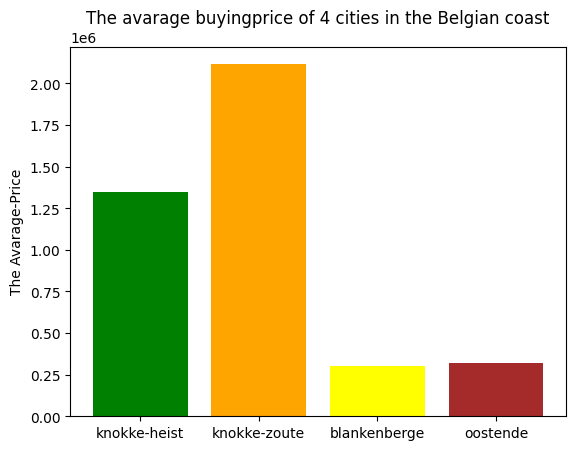

In [58]:
plt.title("The avarage buyingprice of 4 cities in the Belgian coast")
plt.bar(["knokke-heist","knokke-zoute", "blankenberge", "oostende"], [average_prices_knokke_heist, average_prices_knokke_zoute, average_prices_blankenberge, average_prices_oostende], color=['green','orange', 'yellow', 'brown'])
plt.ylabel("The Avarage-Price")
plt.show()

In [59]:
print(int(average_prices_knokke_heist), 
int(average_prices_knokke_zoute), 
int(average_prices_blankenberge), 
int(average_prices_oostende))

1350432 2115317 304189 319465


In [60]:
mediaan = grouped_data["PricePr"].median()
mediaan_knokke_heist = mediaan.loc["knokke-heist"]
mediaan_knokke_zoute = mediaan.loc["knokke-zoute"]
mediaan_blankenberge = mediaan.loc["blankenberge"]
mediaan_oostende = mediaan.loc["oostende"]

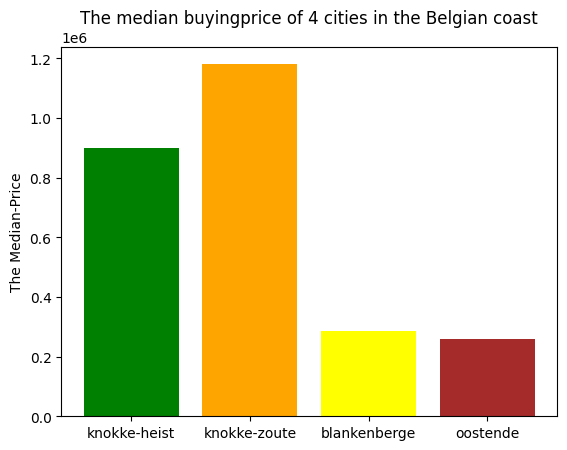

In [61]:
plt.title("The median buyingprice of 4 cities in the Belgian coast")
plt.bar(["knokke-heist","knokke-zoute", "blankenberge", "oostende"],[mediaan_knokke_heist, mediaan_knokke_zoute, mediaan_blankenberge, mediaan_oostende], color=['green','orange', 'yellow', 'brown'])
plt.ylabel("The Median-Price")
plt.show()

In [62]:
print(int(mediaan_knokke_heist), int(mediaan_knokke_zoute), int(mediaan_blankenberge), int(mediaan_oostende))

899000 1180000 287000 259000


In [63]:
data.corr()

/var/folders/2s/222ndh0d3db6hchn4vx3hm740000gn/T/ipykernel_17605/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,PricePr,Bedrooms,Living area,How many fireplaces?,Terrace surface,Garden surface,Surface of the plot,Number of frontages,Swimming pool
ID,1.000000,0.033648,0.075510,0.033039,-0.029815,0.033281,0.027602,0.015676,0.029766,NaN
PricePr,0.033648,1.000000,0.363966,0.323187,-0.090436,0.133213,0.107184,0.060895,0.247733,NaN
Bedrooms,0.075510,0.363966,1.000000,0.549387,-0.140601,0.171370,0.155048,-0.000334,0.302601,NaN
Living area,0.033039,0.323187,0.549387,1.000000,-0.136601,0.218876,0.219020,0.078379,0.360934,NaN
How many fireplaces?,-0.029815,-0.090436,-0.140601,-0.136601,1.000000,-0.122795,-0.055087,-0.014012,-0.079103,NaN
Terrace surface,0.033281,0.133213,0.171370,0.218876,-0.122795,1.000000,0.302821,0.006104,0.200252,NaN
Garden surface,0.027602,0.107184,0.155048,0.219020,-0.055087,0.302821,1.000000,0.032587,0.274221,NaN
Surface of the plot,0.015676,0.060895,-0.000334,0.078379,-0.014012,0.006104,0.032587,1.000000,0.117399,NaN
Number of frontages,0.029766,0.247733,0.302601,0.360934,-0.079103,0.200252,0.274221,0.117399,1.000000,NaN
Swimming pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data.info

<bound method DataFrame.info of             ID      Locality    PricePr Tenement building Venue of the sale  \
0     10166459      oostende   275000.0                No               NaN   
1     10096893  knokke-heist  3195000.0                No               NaN   
2     10292307        knokke   595000.0                No               NaN   
3     10111765  knokke-heist  1850000.0                No               NaN   
4     10124022  knokke-heist   325000.0                No               NaN   
...        ...           ...        ...               ...               ...   
4484   9943361       de-haan   443356.0                No               NaN   
4485   9839652   middelkerke   849000.0                No               NaN   
4486  10220348        brugge   549000.0               Yes               NaN   
4487  10210925  knokke-heist   695000.0                No               NaN   
4488   9960460  knokke-heist  3995000.0                No               NaN   

      Bedrooms  Liv

In [66]:
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)


ID                        0.00
Locality                  0.00
PricePr                   0.00
Tenement building         1.16
Venue of the sale        98.08
Bedrooms                  0.00
Living area               0.00
Kitchen type             46.98
Furnished                31.99
How many fireplaces?      4.50
Terrace                  66.52
Terrace surface           0.00
Garden                   84.99
Garden surface            1.20
Surface of the plot      58.68
Number of frontages       0.02
Swimming pool           100.00
Building condition       33.21
Type                      0.00
Subtype                  84.12
dtype: float64